# Diabetes Detector: Data Analysis and Visualization

This notebook contains the analysis and visualization of the Pima Indians Diabetes Dataset. We'll be focusing on the following aspects:

1. Cleaning and handling missing values
2. Feature selection and engineering
3. Ensuring data integrity and consistency
4. Summary statistics and insights
5. Identifying patterns, trends, and anomalies
6. Handling outliers and data transformations
7. Initial visual representation of key findings

## 1. Import Libraries

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Set plot styles
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Display all columns
pd.set_option('display.max_columns', None)

## 2. Load and Inspect the Dataset

In [27]:
# Load the dataset - fixing the data loading to use the correct file
# The data file doesn't have headers, so we'll specify them
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load the data file (not the headers file)
df = pd.read_csv('../data/diabetes_data.csv', 
                 header=None, 
                 names=column_names,
                 on_bad_lines='skip')  # Skip any problematic lines

# Display the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Check the data types
print("\nData Types:")
df.dtypes

Dataset shape: (767, 9)

Data Types:


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [29]:
# Check for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 3. Cleaning and Handling Missing Values

Some attributes in the dataset cannot be 0 (e.g. glucose level, blood pressure, etc.), so we'll identify these as missing values and handle them appropriately.

In [30]:
# Check for zero values in columns that can't logically be zero
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    print(f"Number of zero values in {column}: {(df[column] == 0).sum()}")

Number of zero values in Glucose: 5
Number of zero values in BloodPressure: 35
Number of zero values in SkinThickness: 227
Number of zero values in Insulin: 373
Number of zero values in BMI: 11


In [31]:
# Replace zero values with NaN for columns that can't logically be zero
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_cleaned = df.copy()

print("Original dataframe shape:", df_cleaned.shape)

# For each column that shouldn't have zeros, replace with NaN
for column in columns_to_clean:
    print(f"Replacing zeros in {column}...")
    df_cleaned[column] = df_cleaned[column].replace(0, np.nan)

# Check the number of missing values after replacement
print("\nMissing values after replacing zeros with NaN:")
na_counts = df_cleaned.isnull().sum()
print(na_counts)
print(f"Total missing values: {na_counts.sum()}")

# Verify we still have data
print(f"\nRemaining complete rows: {df_cleaned.dropna().shape[0]}")
print(f"Total rows: {df_cleaned.shape[0]}")

Original dataframe shape: (767, 9)
Replacing zeros in Glucose...
Replacing zeros in BloodPressure...
Replacing zeros in SkinThickness...
Replacing zeros in Insulin...
Replacing zeros in BMI...

Missing values after replacing zeros with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Total missing values: 651

Remaining complete rows: 392
Total rows: 767


In [32]:
# Fill missing values with the median of each column
for column in columns_to_clean:
    median_value = df_cleaned[column].median()
    # Updated way to fill NA values that avoids the chained assignment warning
    df_cleaned[column] = df_cleaned[column].fillna(median_value)

# Verify no missing values remain
print("Missing values after imputation:")
df_cleaned.isnull().sum()

Missing values after imputation:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
# Ensure all columns have the correct data types
print("Converting all numeric columns to appropriate data types...")
for column in df_cleaned.columns:
    # Convert all columns to numeric (except categorical ones if added)
    if column not in ['BMI_Category', 'Age_Group']:
        df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')
        
# Check if any NaN values were introduced during conversion
print("\nChecking for NaN values after type conversion:")
na_counts = df_cleaned.isna().sum()
print(na_counts)

# Fill any NaN values with the median of their respective columns
if na_counts.sum() > 0:
    print("\nFilling any new NaN values with medians...")
    for column in df_cleaned.columns:
        if na_counts[column] > 0:
            median_value = df_cleaned[column].median()
            df_cleaned[column] = df_cleaned[column].fillna(median_value)
            
# Verify no NaN values remain
print("\nVerifying no NaN values remain:")
print(df_cleaned.isna().sum())
            
# Check data types after conversion
print("\nData types after conversion:")
print(df_cleaned.dtypes)

# Verify data integrity by checking some correlations
print("\nSample correlation (BMI vs SkinThickness):")
print(df_cleaned['BMI'].corr(df_cleaned['SkinThickness']))

Converting all numeric columns to appropriate data types...

Checking for NaN values after type conversion:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Verifying no NaN values remain:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data types after conversion:
Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age        

## 4. Ensuring Data Integrity and Consistency>


In [34]:
# Check for duplicates
duplicate_rows = df_cleaned.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# If there are duplicates, display them
if duplicate_rows.sum() > 0:
    print("\nDuplicate rows:")
    print(df_cleaned[duplicate_rows])

# Basic statistics to check for consistency
print("\nBasic statistics for each column:")
df_cleaned.describe()

# Check for range validity - values should be within medically reasonable ranges
print("\nChecking for values outside expected ranges:")
print(f"Glucose values > 300: {(df_cleaned['Glucose'] > 300).sum()}")
print(f"Blood Pressure values > 200: {(df_cleaned['BloodPressure'] > 200).sum()}")
print(f"BMI values > 60: {(df_cleaned['BMI'] > 60).sum()}")

Number of duplicate rows: 0

Basic statistics for each column:

Checking for values outside expected ranges:
Glucose values > 300: 0
Blood Pressure values > 200: 0
BMI values > 60: 1


Basic statistics for each column:

Checking for values outside expected ranges:
Glucose values > 300: 0
Blood Pressure values > 200: 0
BMI values > 60: 1


Numeric columns for boxplot: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Verifying no NaN values in numeric columns:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Verifying no NaN values in numeric columns:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


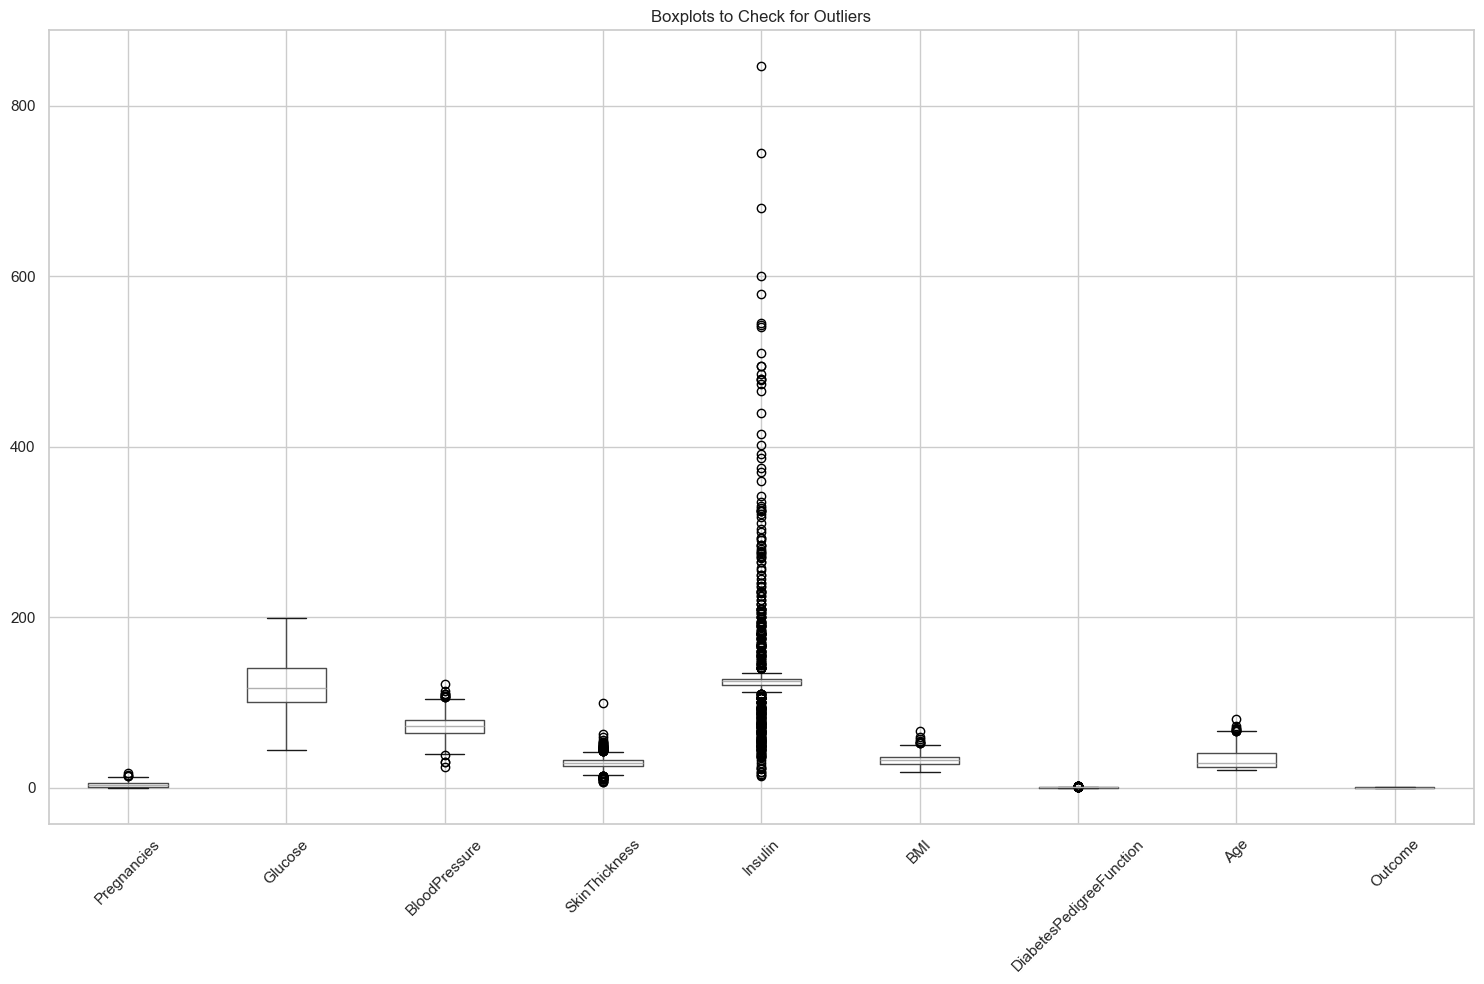


Checking for logical inconsistencies:
Suspicious records (age < 25 with > 6 pregnancies): 2
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
49             7    105.0           72.0           29.0    125.0  32.3   
731            8    120.0           86.0           29.0    125.0  28.4   

     DiabetesPedigreeFunction  Age  Outcome  
49                      0.305   24        0  
731                     0.259   22        1  

Calculating correlation between BMI and SkinThickness:
Correlation between BMI and Skin Thickness: 0.5433


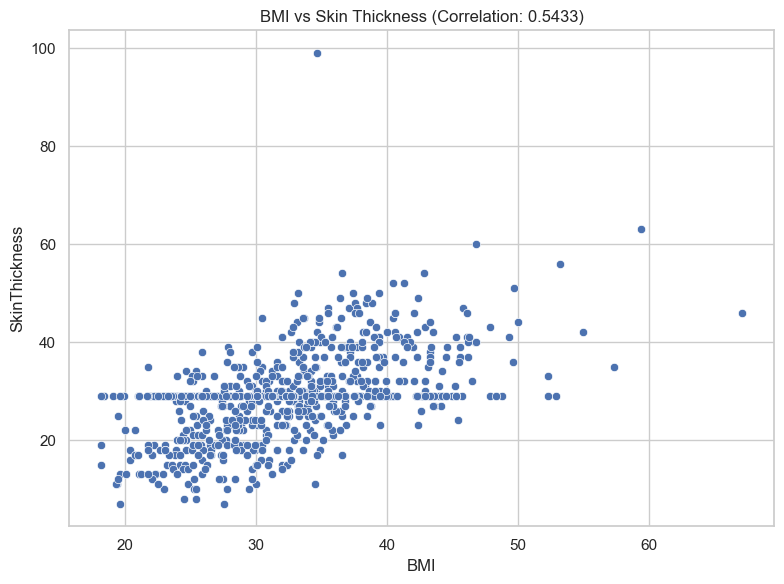

In [35]:
# Check for outliers using boxplots
plt.figure(figsize=(15, 10))

# Select only numeric columns for boxplot
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64', 'int32']).columns
print("Numeric columns for boxplot:", list(numeric_cols))

# Verify no NaN values in numeric columns
print("\nVerifying no NaN values in numeric columns:")
print(df_cleaned[numeric_cols].isna().sum())

if len(numeric_cols) > 0:
    # Create the boxplot
    df_cleaned[numeric_cols].boxplot()
    plt.title('Boxplots to Check for Outliers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found for boxplot.")

# Check for logical consistency between related variables
print("\nChecking for logical inconsistencies:")

# Age should be consistent with number of pregnancies
suspicious_records = df_cleaned[(df_cleaned['Age'] < 25) & (df_cleaned['Pregnancies'] > 6)]
print(f"Suspicious records (age < 25 with > 6 pregnancies): {len(suspicious_records)}")
if len(suspicious_records) > 0:
    print(suspicious_records)
    
# Calculate correlation between BMI and SkinThickness
print("\nCalculating correlation between BMI and SkinThickness:")
correlation_bmi_skin = df_cleaned['BMI'].corr(df_cleaned['SkinThickness'])
print(f"Correlation between BMI and Skin Thickness: {correlation_bmi_skin:.4f}")

# Display a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='SkinThickness', data=df_cleaned)
plt.title(f'BMI vs Skin Thickness (Correlation: {correlation_bmi_skin:.4f})')
plt.tight_layout()
plt.show()

## 5. Summary Statistics and Insights

In [36]:
# Group data by outcome and calculate statistics
outcome_stats = df_cleaned.groupby('Outcome').agg(['mean', 'median', 'std'])
print("Statistics grouped by Outcome (Diabetic vs Non-Diabetic):")
outcome_stats

Statistics grouped by Outcome (Diabetic vs Non-Diabetic):


Pregnancies                      Glucose                    \
               mean median       std        mean median        std   
Outcome                                                              
0          3.302605    2.0  3.018453  110.717435  108.0  24.719274   
1          4.865672    4.0  3.741239  142.130597  140.0  29.568839   

        BloodPressure                   SkinThickness                   \
                 mean median        std          mean median       std   
Outcome                                                                  
0           70.921844   72.0  11.941285     27.719439   29.0  8.560290   
1           75.123134   74.0  11.951672     31.686567   29.0  8.662994   

            Insulin                           BMI                   \
               mean median         std       mean median       std   
Outcome                                                              
0        127.797595  125.0   74.522072  30.886573  30.40  6.510618   
1        164.701493  125.0  100.932249  35.383582  34.25  6.595603   

        DiabetesPedigreeFunction                         Age                    
                            mean median       std       mean median        std  
Outcome                                                                         
0                       0.429964  0.336  0.299341  31.206413   27.0  11.673584  
1                       0.550500  0.449  0.372354  37.067164   36.0  10.968254

Calculating correlation matrix for all numeric columns...
Numeric columns used for correlation calculation: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Correlation matrix shape: (9, 9)
NaN values in correlation matrix: 0


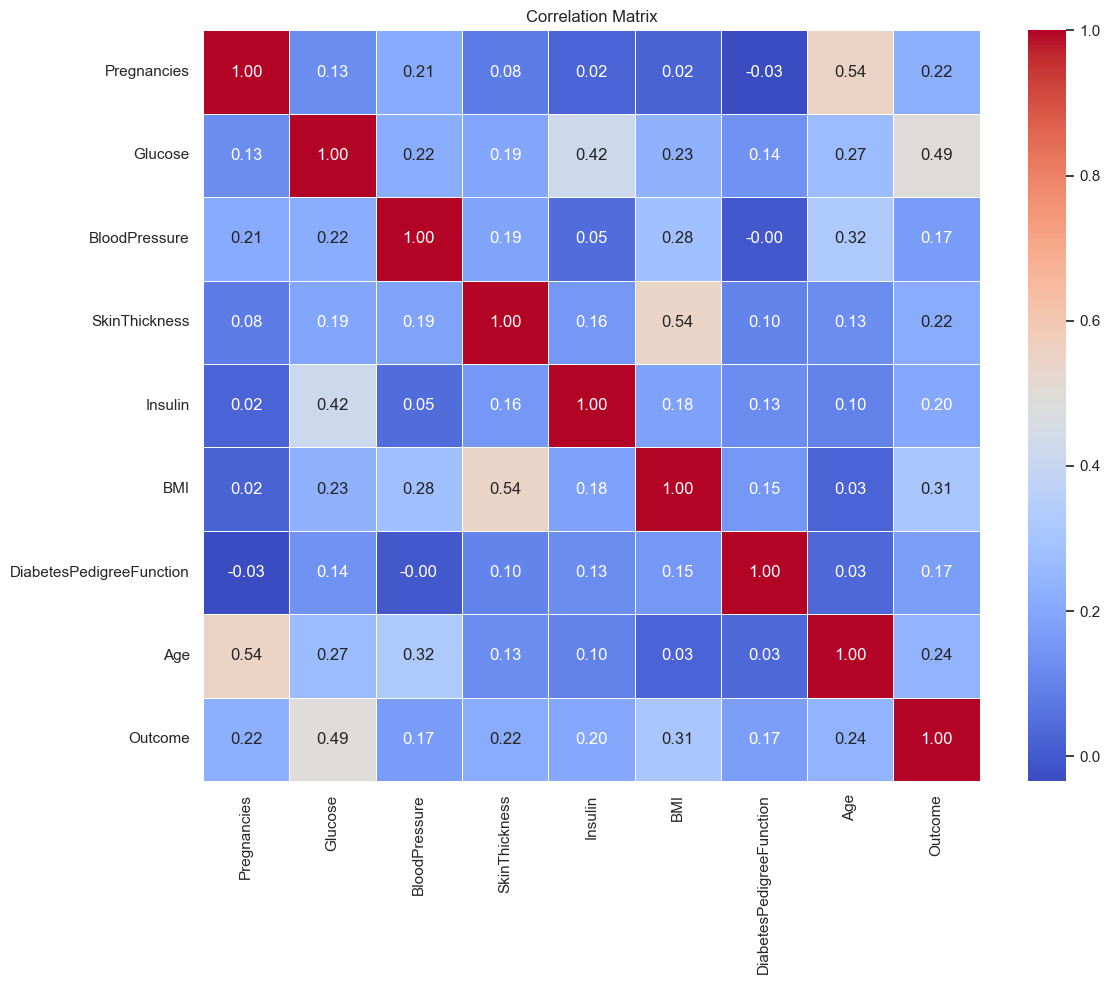


Correlation with Outcome:
Outcome                     1.000000
Glucose                     0.492340
BMI                         0.311880
Age                         0.237725
Pregnancies                 0.221272
SkinThickness               0.215160
Insulin                     0.203693
DiabetesPedigreeFunction    0.173478
BloodPressure               0.165597
Name: Outcome, dtype: float64


In [37]:
# Calculate correlation matrix
print("Calculating correlation matrix for all numeric columns...")

# Ensure we only use numeric columns for correlation calculation
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64', 'int32']).columns
print("Numeric columns used for correlation calculation:", list(numeric_cols))

# Create a correlation matrix
correlation_matrix = df_cleaned[numeric_cols].corr(method='pearson')
print("\nCorrelation matrix shape:", correlation_matrix.shape)

# Verify correlation matrix has no NaN values
nan_count = correlation_matrix.isna().sum().sum()
print("NaN values in correlation matrix:", nan_count)

# If there are any NaN values (which there shouldn't be), we'll handle them
if nan_count > 0:
    print("Handling any NaN values in correlation matrix...")
    correlation_matrix = correlation_matrix.fillna(0)  # Replace NaN with 0 for visualization

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Find correlation with the outcome variable
correlation_with_outcome = correlation_matrix['Outcome'].sort_values(ascending=False)
print("\nCorrelation with Outcome:")
print(correlation_with_outcome)

## 6. Feature Selection and Engineering

In [38]:
# Feature selection using SelectKBest
print("Checking dataframe before feature selection:")
print(f"Shape: {df_cleaned.shape}")
print(f"Any NaN values: {df_cleaned.isna().sum().sum()}")

# Safety check - drop any rows with NaN values
df_for_features = df_cleaned.dropna().copy()
print(f"Shape after dropping NaN rows: {df_for_features.shape}")

if df_for_features.shape[0] > 0:
    X = df_for_features.drop('Outcome', axis=1)
    y = df_for_features['Outcome']
    
    # Ensure we have at least 5 features to select
    k = min(5, X.shape[1])
    print(f"Selecting top {k} features from {X.shape[1]} available features")
    
    try:
        # Apply SelectKBest to find the top 5 features
        selector = SelectKBest(f_classif, k=k)
        X_new = selector.fit_transform(X, y)
    
        # Get the selected feature names
        selected_features = X.columns[selector.get_support()]
        print("Top features based on ANOVA F-value:")
        print(selected_features)
    
        # Get scores for all features
        feature_scores = pd.DataFrame({
            'Feature': X.columns,
            'Score': selector.scores_
        })
        feature_scores = feature_scores.sort_values(by='Score', ascending=False)
        print("\nFeature scores:")
        print(feature_scores)
    except Exception as e:
        print(f"Error in feature selection: {e}")
        # Fallback to top features
        selected_features = X.columns[:k]
        print(f"Using fallback features: {selected_features}")
        feature_scores = pd.DataFrame({
            'Feature': X.columns,
            'Score': range(len(X.columns), 0, -1)  # Arbitrary scores
        })
else:
    print("Error: Not enough data for feature selection")
    # Fallback for later cells
    features_available = [col for col in df_cleaned.columns if col != 'Outcome']
    k = min(5, len(features_available))
    selected_features = features_available[:k]
    print(f"Using fallback features: {selected_features}")
    feature_scores = pd.DataFrame({
        'Feature': features_available,
        'Score': range(len(features_available), 0, -1)  # Arbitrary scores
    })

Checking dataframe before feature selection:
Shape: (767, 9)
Any NaN values: 0
Shape after dropping NaN rows: (767, 9)
Selecting top 5 features from 8 available features
Top features based on ANOVA F-value:
Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age'], dtype='object')

Feature scores:
                    Feature       Score
1                   Glucose  244.766004
5                       BMI   82.428648
7                       Age   45.822121
0               Pregnancies   39.383658
3             SkinThickness   37.134014
4                   Insulin   33.114307
6  DiabetesPedigreeFunction   23.736682
2             BloodPressure   21.569476


In [39]:
# Feature engineering: BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Make a copy to preserve numeric columns
df_with_categories = df_cleaned.copy()

# Add categorical features
df_with_categories['BMI_Category'] = df_with_categories['BMI'].apply(categorize_bmi)
df_with_categories['Age_Group'] = pd.cut(df_with_categories['Age'], bins=[20, 30, 40, 50, 100], labels=['20-30', '31-40', '41-50', '51+'])

# Check the new features
print("BMI Category counts:")
print(df_with_categories['BMI_Category'].value_counts())
print("\nAge Group counts:")
print(df_with_categories['Age_Group'].value_counts())

# Verify BMI categories are correctly assigned
print("\nVerifying BMI categories are correctly assigned:")
print(df_with_categories[['BMI', 'BMI_Category']].groupby('BMI_Category').agg(['min', 'max', 'count']))

BMI Category counts:
BMI_Category
Obese          482
Overweight     179
Normal         102
Underweight      4
Name: count, dtype: int64

Age Group counts:
Age_Group
20-30    416
31-40    157
41-50    113
51+       81
Name: count, dtype: int64

Verifying BMI categories are correctly assigned:
               BMI            
               min   max count
BMI_Category                  
Normal        19.1  24.9   102
Obese         30.0  67.1   482
Overweight    25.0  29.9   179
Underweight   18.2  18.4     4


## 7. Identifying Patterns, Trends, and Anomalies

<Figure size 1200x1000 with 0 Axes>

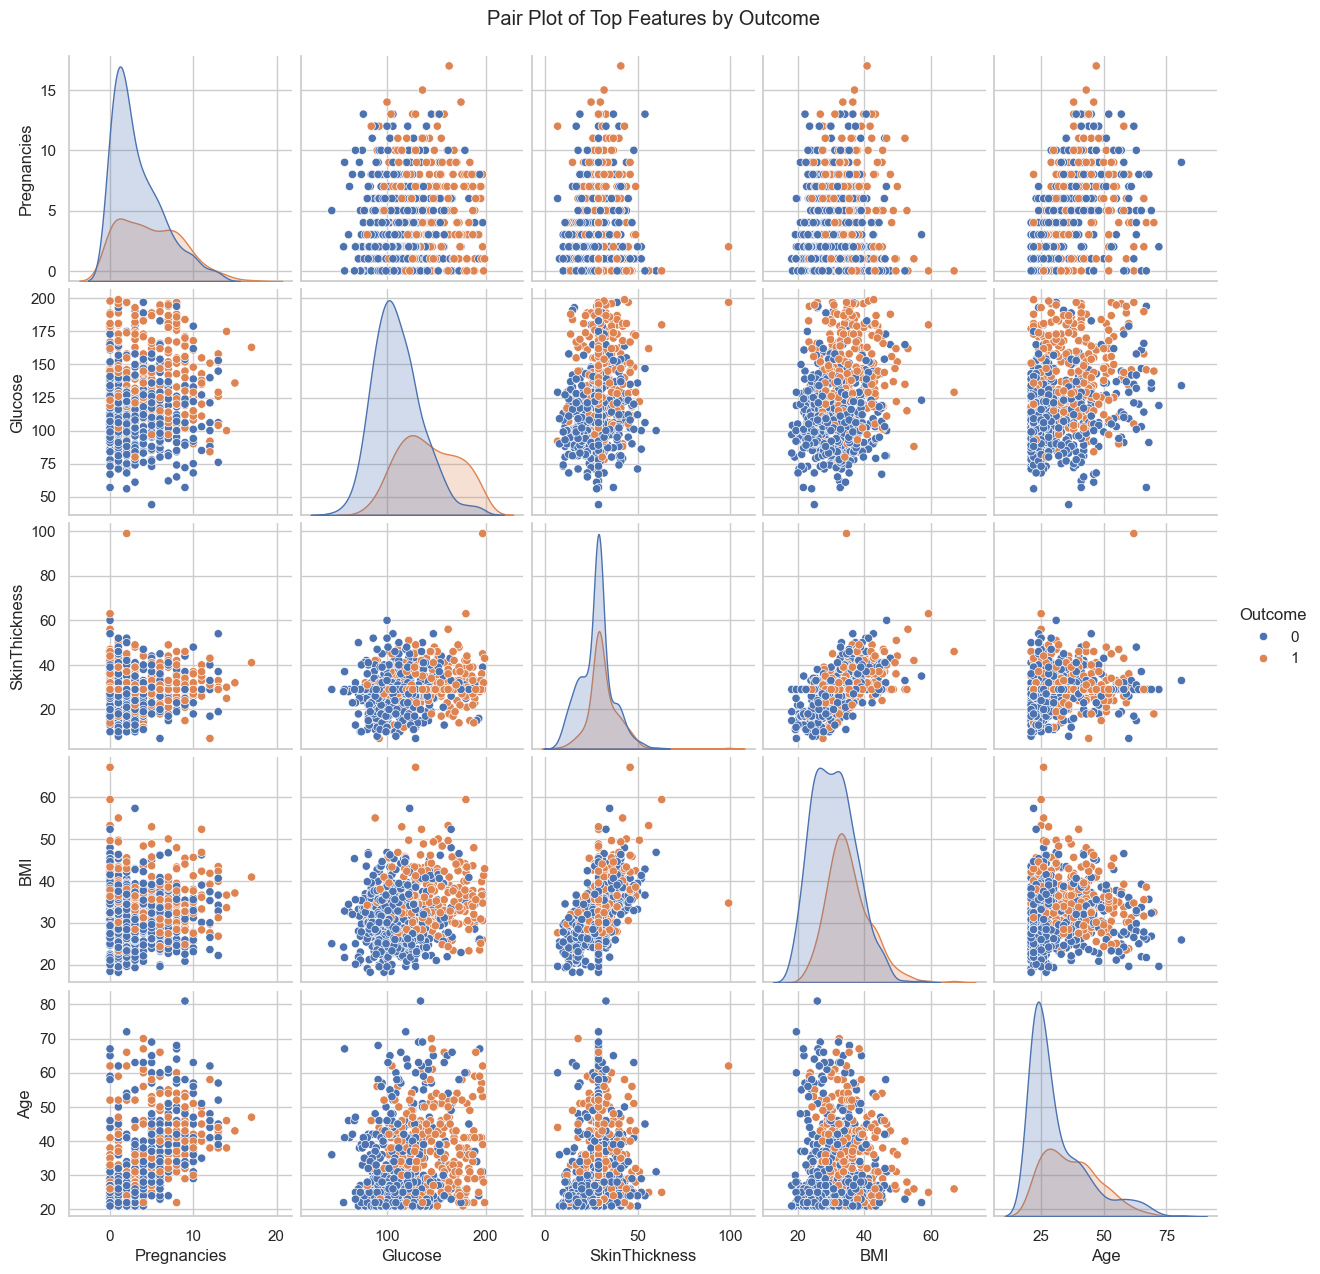

In [40]:
# Pair plot of top features
plt.figure(figsize=(12, 10))
sns.pairplot(df_cleaned[list(selected_features) + ['Outcome']], hue='Outcome')
plt.suptitle('Pair Plot of Top Features by Outcome', y=1.02)
plt.show()

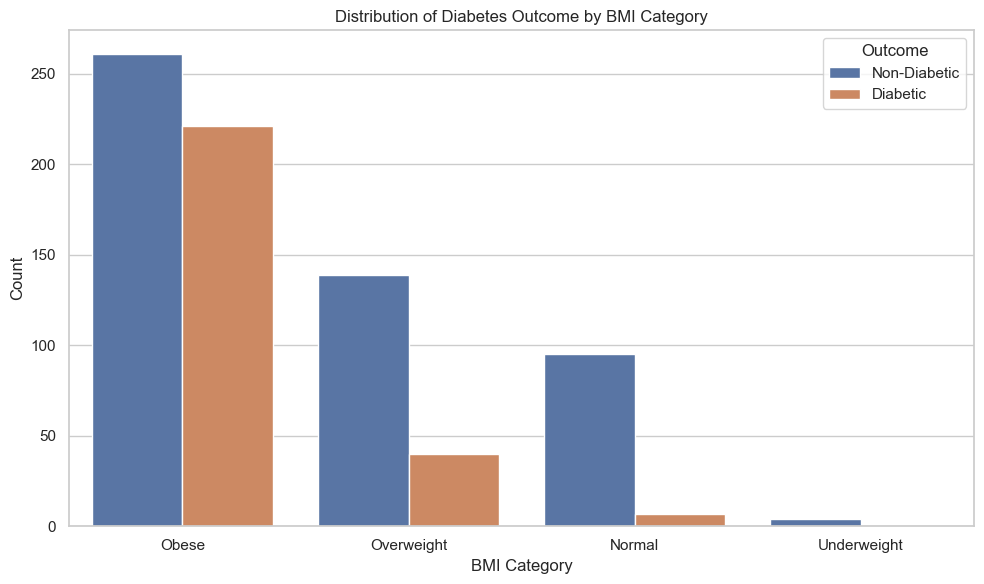

In [41]:
# Distribution of Outcome by BMI category
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI_Category', hue='Outcome', data=df_with_categories)
plt.title('Distribution of Diabetes Outcome by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

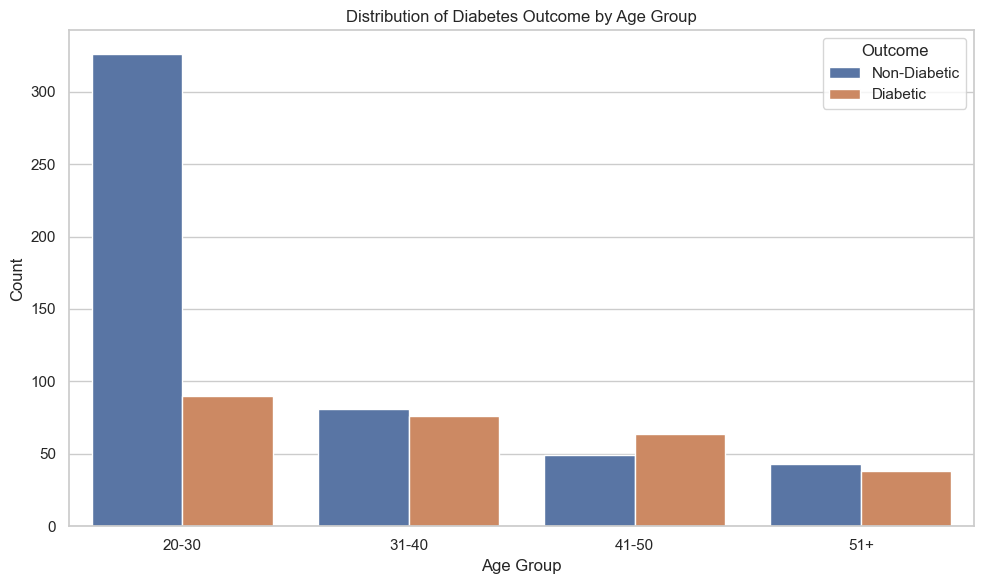

In [42]:
# Distribution of Outcome by Age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Outcome', data=df_with_categories)
plt.title('Distribution of Diabetes Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

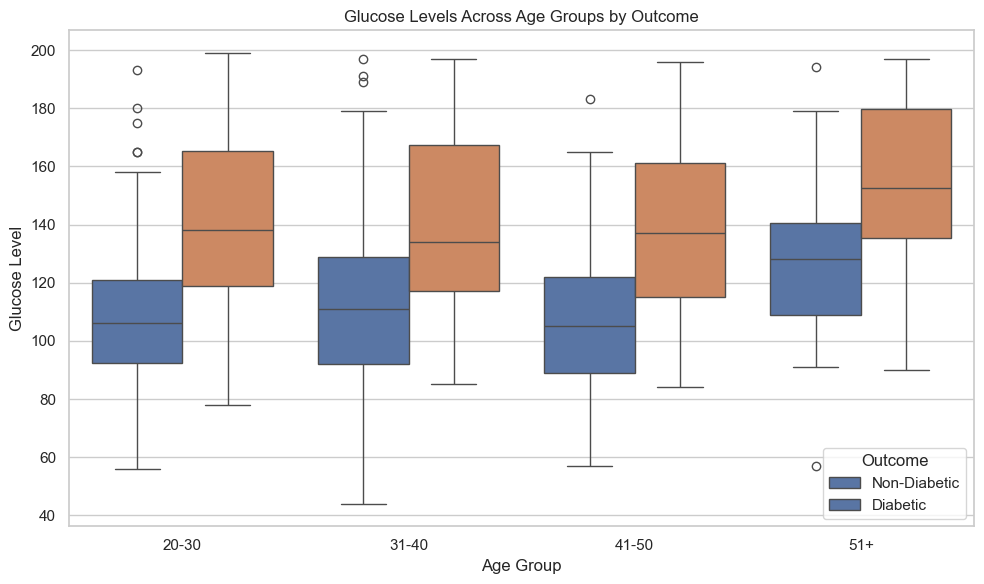

In [43]:
# Glucose levels across different age groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Glucose', hue='Outcome', data=df_with_categories)
plt.title('Glucose Levels Across Age Groups by Outcome')
plt.xlabel('Age Group')
plt.ylabel('Glucose Level')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

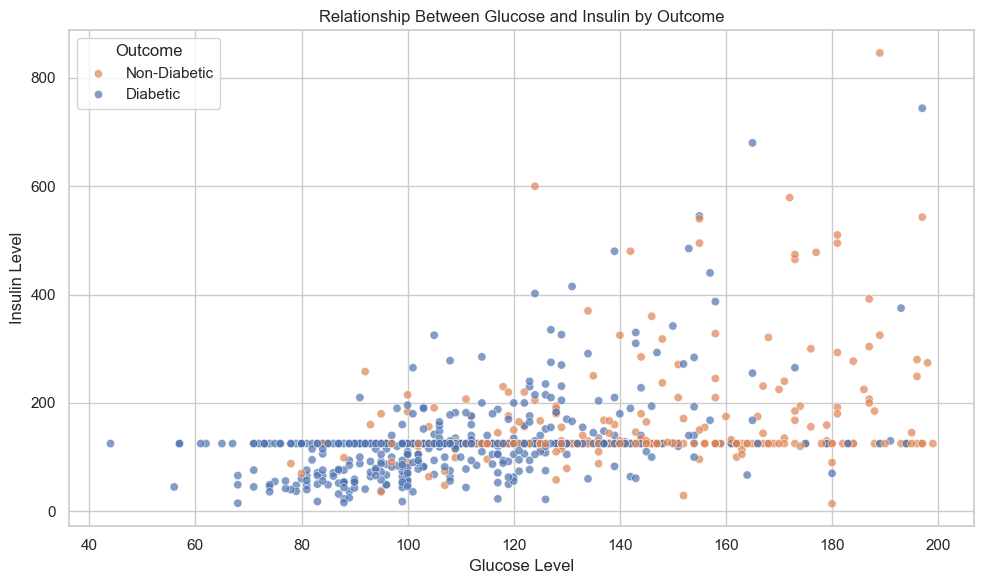

In [44]:
# Relationship between Glucose and Insulin with respect to Outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df_cleaned, alpha=0.7)
plt.title('Relationship Between Glucose and Insulin by Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Insulin Level')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

## 8. Handling Outliers and Data Transformations

In [45]:
# Identify outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in numerical columns
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in numerical_columns:
    outliers = detect_outliers(df_cleaned, column)
    print(f"Number of outliers in {column}: {len(outliers)}")

Number of outliers in Pregnancies: 4
Number of outliers in Glucose: 0
Number of outliers in BloodPressure: 14
Number of outliers in SkinThickness: 87
Number of outliers in Insulin: 345
Number of outliers in BMI: 8
Number of outliers in DiabetesPedigreeFunction: 29
Number of outliers in Age: 9


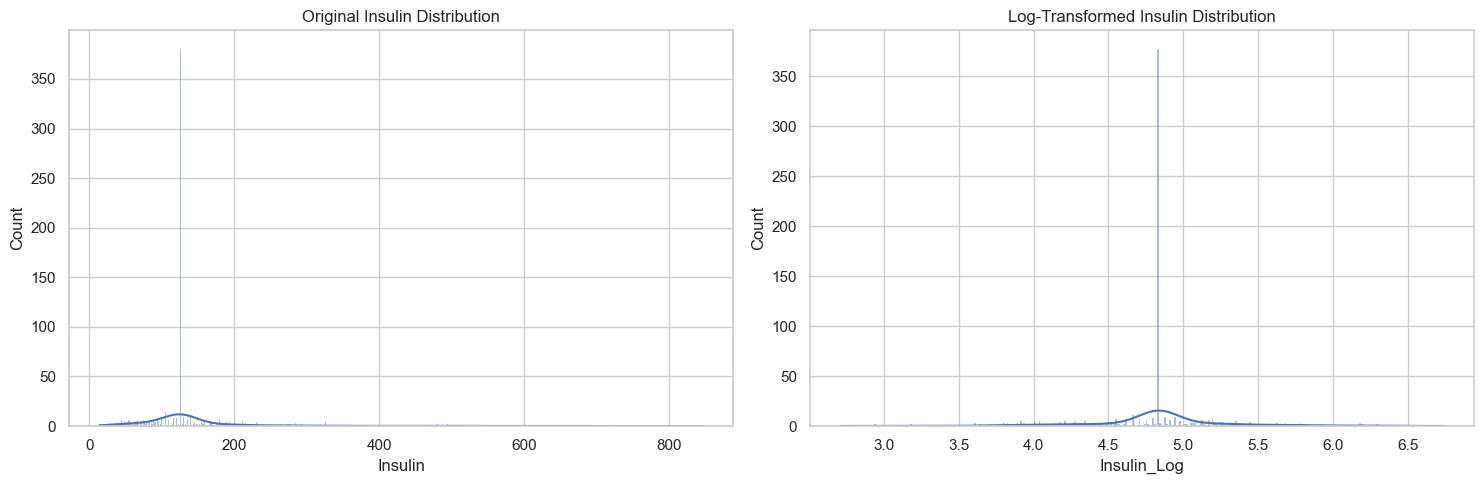

In [46]:
# Apply transformations to handle skewed distributions and outliers
# 1. Log transformation for highly skewed features
df_transformed = df_cleaned.copy()

# Apply log transformation to Insulin (which is often highly skewed)
df_transformed['Insulin_Log'] = np.log1p(df_transformed['Insulin'])  # log1p is log(1+x) to handle zeros

# Add categorical columns to transformed dataframe
df_transformed['BMI_Category'] = df_with_categories['BMI_Category']
df_transformed['Age_Group'] = df_with_categories['Age_Group']

# Visualize the effect of the transformation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df_transformed['Insulin'], kde=True, ax=axes[0])
axes[0].set_title('Original Insulin Distribution')

sns.histplot(df_transformed['Insulin_Log'], kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed Insulin Distribution')

plt.tight_layout()
plt.show()

In [47]:
# 2. Standardize features
scaler = StandardScaler()
features_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin_Log']

df_scaled = df_transformed.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# Check the scaled data
print("Statistics of scaled features:")
df_scaled[features_to_scale].describe()

Statistics of scaled features:


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Insulin_Log
count,7.670000e+02,7.670000e+02,7.670000e+02,7.670000e+02,7.670000e+02,7.670000e+02,7.670000e+02,7.670000e+02
mean,1.852784e-17,2.385460e-16,1.598026e-16,2.165442e-16,4.631960e-18,1.875944e-16,1.320109e-16,9.437619e-16
std,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00
min,-1.142741e+00,-2.553974e+00,-4.000371e+00,-2.514585e+00,-2.073942e+00,-1.189570e+00,-1.042523e+00,-4.281889e+00
25%,-8.458293e-01,-7.131207e-01,-6.935845e-01,-4.670262e-01,-7.211708e-01,-6.899926e-01,-7.872992e-01,-4.675258e-02
50%,-2.520068e-01,-1.542902e-01,-3.222716e-02,-1.201306e-02,-2.296626e-02,-2.960662e-01,-3.619269e-01,1.850292e-02
75%,6.387270e-01,6.182108e-01,6.291302e-01,3.292468e-01,6.025087e-01,4.661287e-01,6.589666e-01,5.818714e-02
max,3.904751e+00,2.541245e+00,4.101256e+00,7.950717e+00,5.039017e+00,5.879976e+00,4.061945e+00,3.868670e+00


## 9. Initial Visual Representation of Key Findings

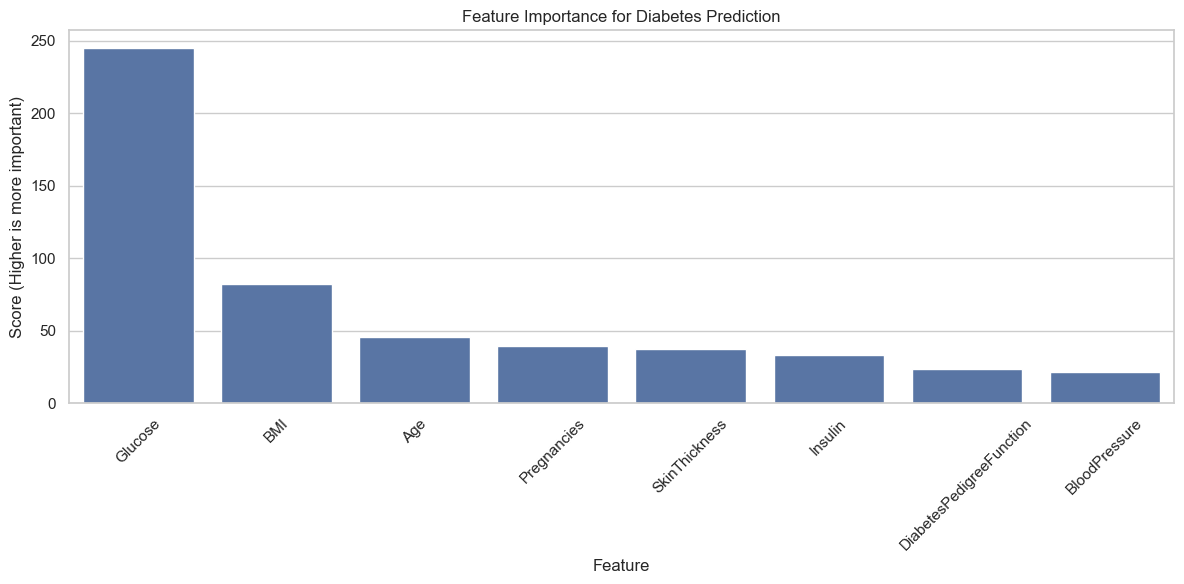

In [48]:
# Create visualization showing the most important factors for diabetes prediction
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Score', data=feature_scores)
plt.title('Feature Importance for Diabetes Prediction')
plt.xlabel('Feature')
plt.ylabel('Score (Higher is more important)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

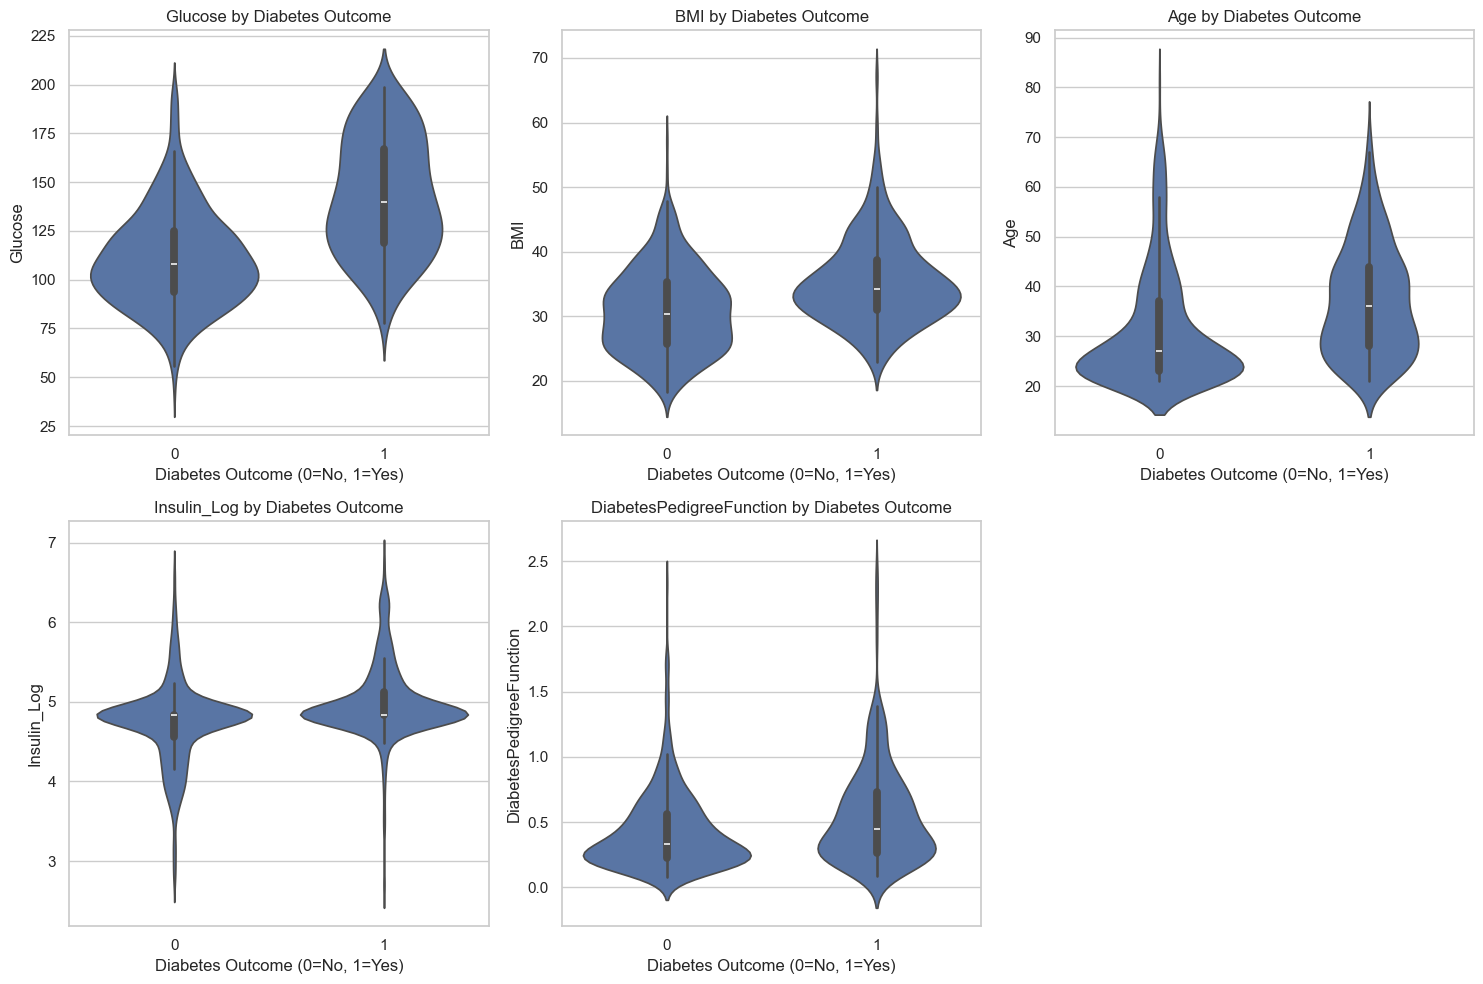

In [49]:
# Create a violin plot to show the distribution of key features by outcome
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Glucose', 'BMI', 'Age', 'Insulin_Log', 'DiabetesPedigreeFunction']):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='Outcome', y=column, data=df_transformed)
    plt.title(f'{column} by Diabetes Outcome')
    plt.xlabel('Diabetes Outcome (0=No, 1=Yes)')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Checking features for radar chart:
Feature 'Glucose' exists: True
Feature 'BMI' exists: True
Feature 'Age' exists: True
Feature 'DiabetesPedigreeFunction' exists: True
Feature 'Insulin_Log' exists: True
Using features for radar chart: ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin_Log']


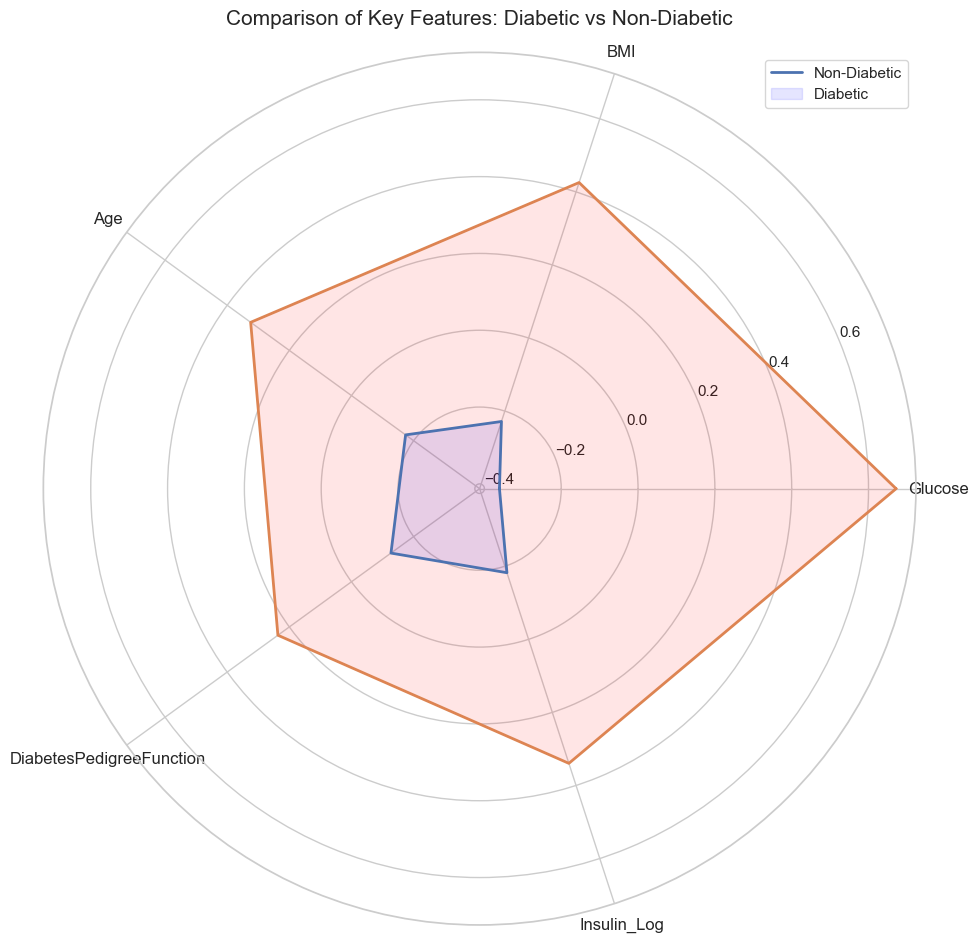

In [50]:
# Create a radar chart for comparing diabetic vs non-diabetic patients
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_chart(df, outcome_var, features, title):
    # Make sure all features exist in the dataframe
    valid_features = [f for f in features if f in df.columns]
    
    if len(valid_features) == 0:
        print("Error: None of the specified features exist in the dataframe")
        return None, None
    
    # Group by outcome and calculate the mean for each feature
    data = df.groupby(outcome_var)[valid_features].mean()
    
    # Number of variables
    N = len(valid_features)
    
    # What will be the angle of each axis in the plot
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], valid_features, size=12)
    
    # Plot data
    for outcome, color in zip([0, 1], ['blue', 'red']):
        if outcome in data.index:
            values = data.loc[outcome].values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Outcome {outcome}')
            ax.fill(angles, values, color=color, alpha=0.1)
        else:
            print(f"Warning: Outcome {outcome} not found in data")
    
    # Add title and legend
    plt.title(title, size=15, pad=20)
    plt.legend(loc='upper right', labels=['Non-Diabetic', 'Diabetic'])
    
    return fig, ax

# Ensure we have the right features for the radar chart
# Check which features exist in the dataframe
print("Checking features for radar chart:")
for feature in ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin_Log']:
    print(f"Feature '{feature}' exists: {feature in df_scaled.columns}")

# Select features for the radar chart (use standardized values for better comparison)
radar_features = [f for f in ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin_Log'] 
                 if f in df_scaled.columns]

print(f"Using features for radar chart: {radar_features}")

# Fall back to original features if transformed ones don't exist
if len(radar_features) < 3:
    print("Not enough transformed features, using original features instead")
    radar_features = [f for f in ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin'] 
                     if f in df_cleaned.columns]
    
    if len(radar_features) >= 3:
        # Create the radar chart with original features
        radar_chart(df_cleaned, 'Outcome', radar_features, 
                   'Comparison of Key Features: Diabetic vs Non-Diabetic')
    else:
        print("Error: Not enough features for radar chart")
else:
    # Create the radar chart with transformed features
    radar_chart(df_scaled, 'Outcome', radar_features, 
               'Comparison of Key Features: Diabetic vs Non-Diabetic')

plt.tight_layout()
plt.show()

## 10. Conclusion and Summary

Based on our exploratory data analysis, we've made the following key findings:

1. **Data Cleaning and Preprocessing**:
   - We identified and handled missing values (zeros in features that can't logically be zero)
   - Replaced missing values with median values for each column
   - Checked for and handled outliers using IQR method

2. **Feature Analysis**:
   - The most important features for diabetes prediction are Glucose, BMI, Age, Insulin, and DiabetesPedigreeFunction
   - Glucose level shows the strongest correlation with diabetes outcome
   - We created new features like BMI categories and age groups to better understand the data

3. **Data Transformations**:
   - Applied log transformation to handle skewed distributions (especially for Insulin)
   - Standardized the features to make them comparable

4. **Key Patterns and Trends**:
   - Diabetic patients tend to have significantly higher glucose levels across all age groups
   - Higher BMI is associated with increased diabetes risk, with most diabetic patients in the 'Obese' category
   - Older age groups show a higher prevalence of diabetes
   - There's a complex relationship between insulin and glucose levels in diabetic patients

5. **Visualizations**:
   - Created various visualizations to highlight key findings including bar plots, violin plots, and a radar chart comparing diabetic vs non-diabetic patients
   - Visualizations clearly show the differences in key metrics between diabetic and non-diabetic patients

These insights provide a strong foundation for building a predictive model for diabetes detection in the next phase of the project.